In [1]:
#Here we are working on data from the 2012 election

In [2]:
#First of all, let's do the imports 
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

#Vizualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from __future__ import division

In [4]:
#All the data will be obtained from HuffPost Pollster

In [5]:
#For import data from web and to work with csv data we will import some other things

In [6]:
#To grab data for web
import requests 

#To work with csv file
from io import StringIO

In [7]:
# This is the url link for the poll data in csv form
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

# Use requests to get the information in text form
source = requests.get(url).text

# Use StringIO to avoid an IO error with pandas
poll_data = StringIO(source) 

In [8]:
#Setting poll data as a Pandas DataFrame
poll_df=pd.read_csv(poll_data)


In [9]:
#Looking the data Frame

poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


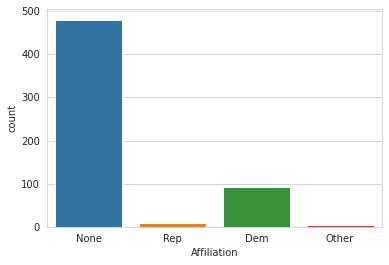

In [10]:
#Having a quick look in the affiliantion
sns.countplot('Affiliation',data=poll_df)

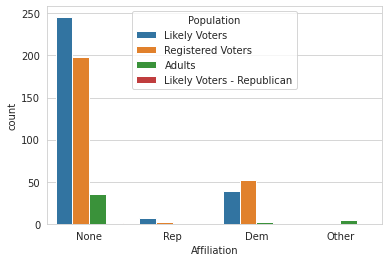

In [11]:
#the majority is neutral, but democratic affiliation is more representative than Republican

#Let's see if sorting with the population we have a different panoram
sns.countplot('Affiliation',data=poll_df,hue='Population')

In [12]:
#Going ahead and taking a look at the avarages of Obama, Romney and the undecided


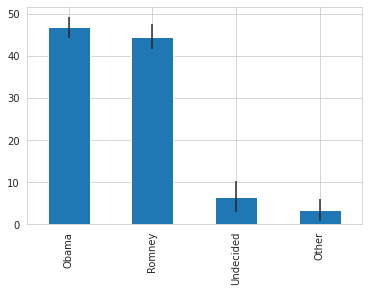

In [13]:
#doing the avarage
avg =pd.DataFrame(poll_df.mean())
avg.drop('Number of Observations', axis=0,inplace=True)
avg.drop(['Question Text','Question Iteration'], axis=0, inplace=True)

#Getting the error
std = pd.DataFrame(poll_df.std())

#Plotting using pandas
avg.plot(yerr=std,kind='bar',legend=False)

In [14]:
#They were so close, let's take a look in numbers

#Concatenate Avg and Std
poll_avg=pd.concat([avg,std], axis=1)
poll_avg.drop('Number of Observations', axis=0,inplace=True)
poll_avg.drop(['Question Text','Question Iteration'], axis=0, inplace=True)


#Rename de columns
poll_avg.columns = ['Avarage','STD']

#Show
poll_avg

,Avarage,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726


In [15]:
#This was a fairly close election, let's take a look in the undecided voters.

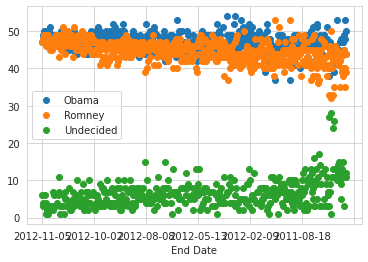

In [16]:
#Ploting the sentiment in the polls versus time
poll_df.plot(x='End Date',y=['Obama','Romney','Undecided'],marker='o',linestyle='')

In [17]:
#Now I am plotting the difference between Obama and Romney and how it changes as time moves along

In [18]:
#For timestamps
from datetime import datetime

In [19]:
#Creating a new column. The difference between the two candidates
poll_df['Difference'] = (poll_df.Obama - poll_df.Romney)/100
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01


In [20]:
#Using group by to group the polls by their start data and then sorting it by that Start Date

In [21]:
poll_df = poll_df.groupby(['Start Date'], as_index = False).mean()
#Let's look like how it seens
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


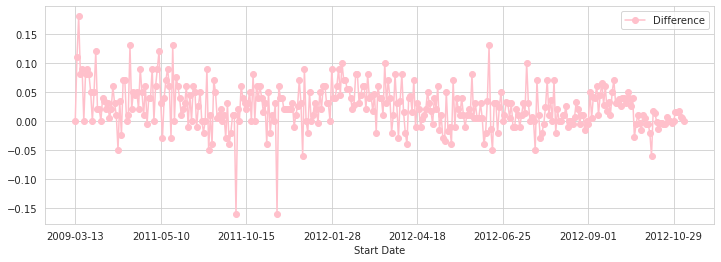

In [22]:
#Now we are plotting the difference in polls between Obama and Romney
fig = poll_df.plot('Start Date','Difference', figsize=(12,4),marker='o',linestyle='-',color='pink')

In [23]:
#When the difference was positive Obama was wining, how can we see in the major part of time Obama was in advantage

In [24]:
#It would be very interesting to plot marker lines on the dates of the debates and see if there is any general insight to the poll results.

#The dabates were in October, so I need to find where to set the X limits for to see if the intencion of the voters changed after the debates


In [25]:
#Set row count and xlimit list
row_in = 0
xlimit = []

# Cycle through dates until 2012-10 is found, the print row index
for date in poll_df['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        row_in += 1
    else:
        row_in += 1
        
print(min(xlimit))
print(max(xlimit))

325
352


In [26]:
#Now I now where set my X limits for the October month

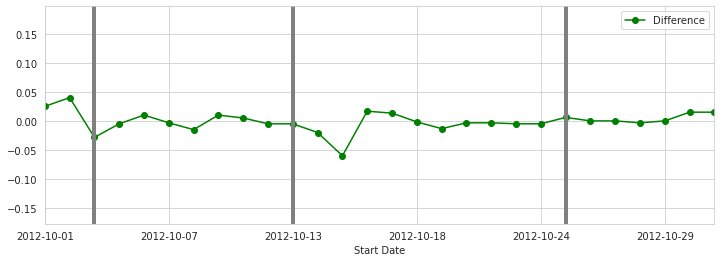

In [27]:
#Start with the original figure
fig = poll_df.plot('Start Date', 'Difference', figsize=(12,4), marker='o',linestyle='-',color='green',xlim=(325,352))

#Now putting the dabate markers
plt.axvline(x=325+2,  linewidth=4, color='grey')
plt.axvline(x=325+10, linewidth=4, color='grey')
plt.axvline(x=325+21, linewidth=4, color='grey')

In [28]:
#Surprisingly, thse polls reflect a dip for Obama after the second debate against Romney, even though memory serves that he performed much worse against Romney during the first debate.

#For all these polls it is important to remeber how geographical location can effect the value of a poll in predicting the outcomes of a national election

In [29]:
#Now let's look for information on donations to the federal campaing

In [30]:
# Setting the DataFrame
donor_df = pd.read_csv('Election_Donor_Data.csv')

/home/ana/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
#Quick overview
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [32]:
#Get a quick look at the various donation amounts
donor_df['contb_receipt_amt'].value_counts()

100.00    178188
50.00     137584
25.00     110345
250.00     91182
500.00     57984
           ...  
97.15          1
122.32         1
188.65         1
122.40         1
132.12         1
Name: contb_receipt_amt, Length: 8079, dtype: int64

In [33]:
#Get the mean donation
don_mean = donor_df['contb_receipt_amt'].mean()

#Get the std of the donation
don_std = donor_df['contb_receipt_amt'].std()

print('The avarage donation was %.2f with a std of %.2f' %(don_mean,don_std))

The avarage donation was 298.24 with a std of 3749.67


In [34]:
#This is a huge standart derivation, we need to see if were any large donations.

In [35]:
#Making a Series from the DataFrame
top_donor = donor_df['contb_receipt_amt']

#Now sort it
top_donor.sort_values()

#Then check the Series
top_donor

0           250.0
1            50.0
2           250.0
3           250.0
4           300.0
            ...  
1001726    5000.0
1001727    2500.0
1001728     500.0
1001729     500.0
1001730    2500.0
Name: contb_receipt_amt, Length: 1001731, dtype: float64

In [36]:
#There were some huge values, let's look closely in this values

In [37]:
#Get rid of the negativa values
top_donor = top_donor[top_donor >0]

#Sort the series
top_donor.sort_values()

#look at the top 10 most common donations values count
top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

In [38]:
#The range of donation were 10 to 2500 dolars
#Let's visualize this in a histogram


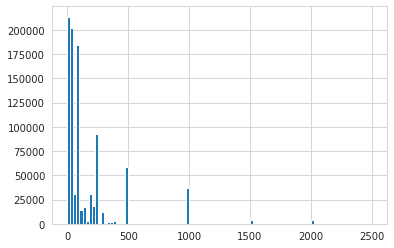

In [39]:
#Create a series of the common donations limited to 2500
com_don = top_donor[top_donor<2500]

#Doing the histogram with a large quantity of bins
com_don.hist(bins=100)

In [40]:
#Let's try to split the donations by party. First, picking up the list of cadidates

In [41]:
#Grab the unique object from the candidate column
candidates = donor_df.cand_nm.unique()
#show
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [42]:
#Dictionary of party affiliation
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

# Now map the party with candidate
donor_df['Party'] = donor_df.cand_nm.map(party_map)

In [43]:
#clear refunds
donor_df = donor_df[donor_df.contb_receipt_amt>0]

#show DataFrame
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [44]:
#Aggregating data by candidate, we will take a quick look at the total amounts received by each one.

In [45]:
#Groupby candidate and then display the total number of people who donate
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [46]:
#Obama received the most of the donation, which makes sense, since he wasn't competing with any other democratic nominees.

In [47]:
#Groupby candidate and then display the total amount donated
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

In [48]:
#Becaming this data more readble

In [52]:
#Start setting the groupby as an object
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

#start the index
i = 0

for don in cand_amount:
    print('The candidade %s raised %.0f dolars' %(cand_amount.index[i],don))
    print ('\n')
    i += 1

The candidade Bachmann, Michelle raised 2711439 dolars


The candidade Cain, Herman raised 7101082 dolars


The candidade Gingrich, Newt raised 12832770 dolars


The candidade Huntsman, Jon raised 3330373 dolars


The candidade Johnson, Gary Earl raised 566962 dolars


The candidade McCotter, Thaddeus G raised 39030 dolars


The candidade Obama, Barack raised 135877427 dolars


The candidade Paul, Ron raised 21009620 dolars


The candidade Pawlenty, Timothy raised 6004819 dolars


The candidade Perry, Rick raised 20305754 dolars


The candidade Roemer, Charles E. 'Buddy' III raised 373010 dolars


The candidade Romney, Mitt raised 88335908 dolars


The candidade Santorum, Rick raised 11043159 dolars




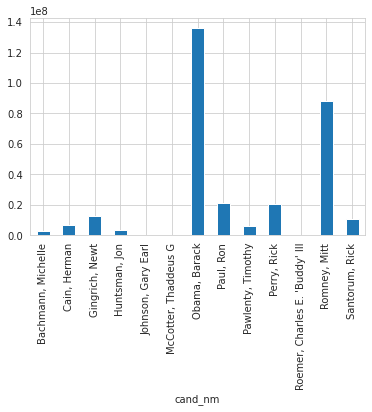

In [54]:
#Plotting the information
cand_amount.plot(kind='bar')

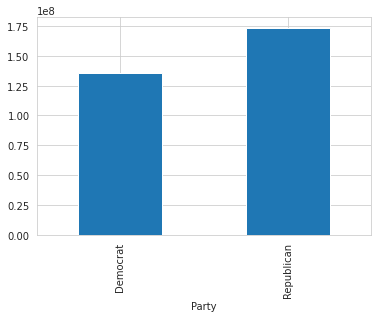

In [55]:
#Comparing democrat vs Republican donations
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')

In [56]:
#Looking for donations and who they came from.

In [57]:
#Using a pivot table to extract and organize the data by the donor occupation
occupation_df = donor_df.pivot_table('contb_receipt_amt',index ='contbr_occupation',columns='Party',aggfunc='sum')

In [58]:
occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [59]:
#How big is the DataFrame?
occupation_df.shape

(45067, 2)

In [60]:
#This is a large amount of the information!!Let's cut off the small ones because they dont tell us a lot about the data

In [63]:
occupation_df = occupation_df[occupation_df.sum(1)>1000000]

In [64]:
#Now let's see the size!!
occupation_df.shape

(31, 2)

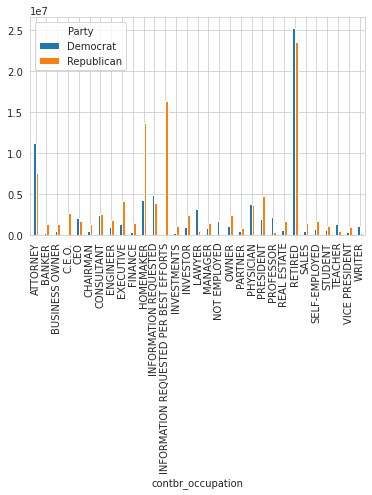

In [65]:
#This is better for vizualization
occupation_df.plot(kind='bar')

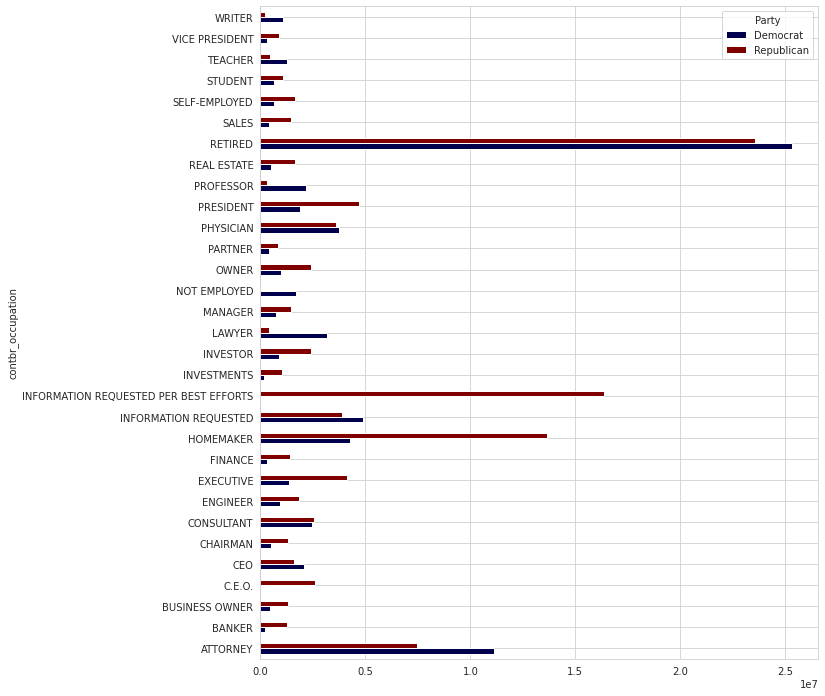

In [67]:
#Changing the axis of the occupations to became them better for to read
occupation_df.plot(kind='barh',figsize=(10,12),cmap='seismic')

In [68]:
# Drop the unavailble occupations
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'],axis=0,inplace=True)

In [69]:

# Set new ceo row as sum of the current two
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']
# Drop CEO
occupation_df.drop('C.E.O.',inplace=True)

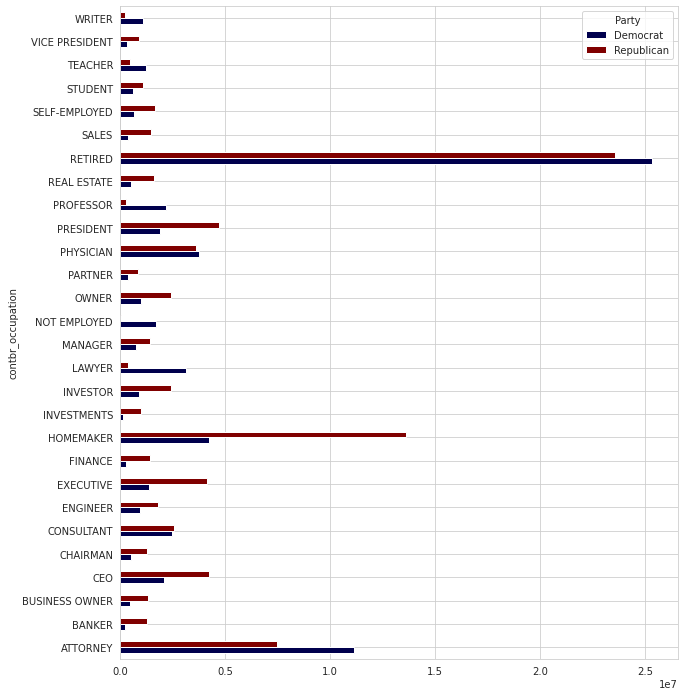

In [70]:

# Repeat previous plot!
occupation_df.plot(kind='barh',figsize=(10,12),cmap='seismic')